In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

data = pd.read_csv('~/Downloads/data4b.csv')
fp = fm.FontProperties(fname='/Library/Fonts/Yu Gothic Medium.otf', size=12)

In [2]:
data.info()
print()
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
y    100 non-null int64
x    100 non-null float64
A    100 non-null float64
dtypes: float64(2), int64(1)
memory usage: 2.4 KB

                y           x           A
count  100.000000  100.000000  100.000000
mean    48.090000    0.514100   10.468000
std     17.137056    0.188573    2.927262
min     13.000000    0.050000    3.500000
25%     36.000000    0.400000    8.800000
50%     46.000000    0.515000   10.300000
75%     59.500000    0.642500   12.150000
max     95.000000    0.990000   17.400000


/Users/yusuke-nishioka/.anyenv/envs/pyenv/versions/3.5.2/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


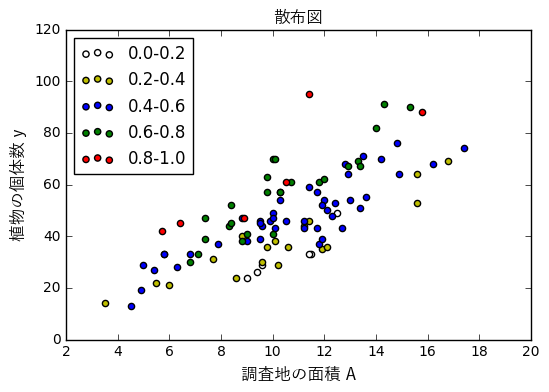

In [7]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(data.A[data.x < 0.2], data.y[data.x < 0.2], label='0.0-0.2', c='w')
ax.scatter(data.A[(data.x >= 0.2) & (data.x < 0.4)],
           data.y[(data.x >= 0.2) & (data.x < 0.4)], label='0.2-0.4', c='y')
ax.scatter(data.A[(data.x >= 0.4) & (data.x < 0.6)],
           data.y[(data.x >= 0.4) & (data.x < 0.6)], label='0.4-0.6', c='b')
ax.scatter(data.A[(data.x >= 0.6) & (data.x < 0.8)],
           data.y[(data.x >= 0.6) & (data.x < 0.8)], label='0.6-0.8', c='g')
ax.scatter(data.A[(data.x >= 0.8) & (data.x < 1.0)],
           data.y[(data.x >= 0.8) & (data.x < 1.0)], label='0.8-1.0', c='r')
ax.legend(loc='upper left')
ax.set_xlabel('調査地の面積 A', fontproperties=fp)
ax.set_ylabel('植物の個体数 y', fontproperties=fp)
ax.set_title('散布図', fontproperties=fp)
fig.show()

In [8]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
glm = smf.glm(formula='y ~ x', data=data, offset=np.log(data.A),
              family=sm.families.Poisson())
res = glm.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -323.17
Date:                Tue, 13 Dec 2016   Deviance:                       81.608
Time:                        07:10:13   Pearson chi2:                     81.5
No. Iterations:                     7                                         
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.9731      0.045     21.600      0.000         0.885     1.061
x              1.0383      0.078     13.364      0.0

/Users/yusuke-nishioka/.anyenv/envs/pyenv/versions/3.5.2/lib/python3.5/site-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in log
/Users/yusuke-nishioka/.anyenv/envs/pyenv/versions/3.5.2/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


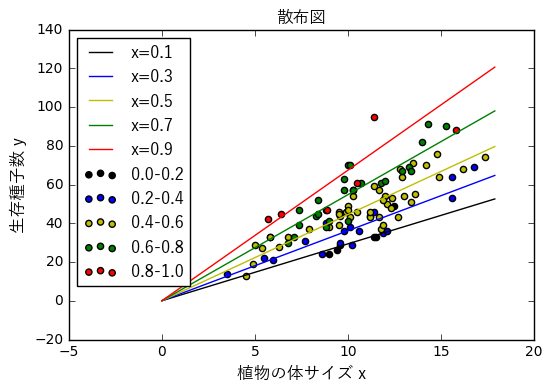

In [18]:
def gen_ytest(res, x: float, Arange: np.array):
    xrange = [x for i in range(0, len(Arange))]
    x_test = pd.DataFrame({'x': xrange, 'A': Arange})
    return res.predict(x_test, offset=np.log(x_test.A))

Arange = np.arange(0, 18, 0.1)
ytest_01 = gen_ytest(res, 0.1, Arange)
ytest_03 = gen_ytest(res, 0.3, Arange)
ytest_05 = gen_ytest(res, 0.5, Arange)
ytest_07 = gen_ytest(res, 0.7, Arange)
ytest_09 = gen_ytest(res, 0.9, Arange)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(data.A[data.x < 0.2], data.y[data.x < 0.2], label='0.0-0.2', c='black')
ax.plot(Arange, ytest_01, c='black', label='x=0.1')
ax.scatter(data.A[(data.x >= 0.2) & (data.x < 0.4)],
           data.y[(data.x >= 0.2) & (data.x < 0.4)], label='0.2-0.4', c='b')
ax.plot(Arange, ytest_03, c='b', label='x=0.3')
ax.scatter(data.A[(data.x >= 0.4) & (data.x < 0.6)],
           data.y[(data.x >= 0.4) & (data.x < 0.6)], label='0.4-0.6', c='y')
ax.plot(Arange, ytest_05, c='y', label='x=0.5')
ax.scatter(data.A[(data.x >= 0.6) & (data.x < 0.8)],
           data.y[(data.x >= 0.6) & (data.x < 0.8)], label='0.6-0.8', c='g')
ax.plot(Arange, ytest_07, c='g', label='x=0.7')
ax.scatter(data.A[(data.x >= 0.8) & (data.x < 1.0)],
           data.y[(data.x >= 0.8) & (data.x < 1.0)], label='0.8-1.0', c='r')
ax.plot(Arange, ytest_09, c='r', label='x=0.9')
ax.set_xlabel('植物の体サイズ x', fontproperties=fp)
ax.set_ylabel('生存種子数 y', fontproperties=fp)
ax.legend(loc='best', fontsize=10, prop=fp)
ax.set_title('散布図', fontproperties=fp)
fig.show()